In [1]:
# # Pytorch MNIST digits example from https://machinelearningmastery.com/handwritten-digit-recognition-with-lenet5-model-in-pytorch/
# # THIS IS ME PLAYING WITH a relatively large MLP for fun
# # SEEMS TO WORK WELL > 98% ACCURACY!!!


# # Imports
import torch # Main PyTorch module
import torch.nn as nn # Neural Network module
import torch.optim as optim  # Optimization module
import torchvision # Computer Vision module
import matplotlib.pyplot as plt
from tqdm import tqdm
import sys
import numpy as np
import time
# import nnfs



/Users/user/miniconda3/envs/mlproj/lib/python3.12/site-packages/torchvision/io/image.py:14: UserWarning: Failed to load image Python extension: 'dlopen(/Users/user/miniconda3/envs/mlproj/lib/python3.12/site-packages/torchvision/image.so, 0x0006): Library not loaded: @rpath/libjpeg.9.dylib
  Referenced from: <367D4265-B20F-34BD-94EB-4F3EE47C385B> /Users/user/miniconda3/envs/mlproj/lib/python3.12/site-packages/torchvision/image.so
  Reason: tried: '/Users/user/miniconda3/envs/mlproj/lib/python3.12/site-packages/torchvision/../../../libjpeg.9.dylib' (no such file), '/Users/user/miniconda3/envs/mlproj/lib/python3.12/site-packages/torchvision/../../../libjpeg.9.dylib' (no such file), '/Users/user/miniconda3/envs/mlproj/lib/python3.12/lib-dynload/../../libjpeg.9.dylib' (no such file), '/Users/user/miniconda3/envs/mlproj/bin/../lib/libjpeg.9.dylib' (no such file)'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be someth

In [2]:

X = [[1,2,3,2.5],[2.0,5.0,-1.0,2.0],[ -1.5,2.7,3.3,-0.8]] ## 3 sets of inputs data 

## Create Layer class 
class Layer_Dense: 
    def __init__(self, n_inputs, n_neurons): ## n_inputs = number of inputs to the layer, n_neurons = number of neurons in the layer
        ## Initialize weights and biases
        self.weights = 0.10 * np.random.randn(n_inputs, n_neurons) ## Random weights with small values. This is useful for forward pass and we do not need to transpose weights here.
        self.biases = np.zeros((1, n_neurons)) ## Biases should be initialized to zero values

    def forward(self, inputs):
        ## Forward pass
        self.output = np.dot(inputs, self.weights) + self.biases



## Create first layer
layer1 = Layer_Dense(n_inputs=4, n_neurons=5) ## First layer with 4 inputs and 5 neurons
layer2 = Layer_Dense(n_inputs=5, n_neurons=2) ## Second layer with 5 inputs (from previous layer) and 2 neurons
## Forward pass through the layers
layer1.forward(X) ## Forward pass through first layer. We will now have layer1.output value
print("Layer 1 output = \n", layer1.output) ## Print output of first layer
layer2.forward(layer1.output) ## Forward pass through second layer. We will now have layer2.output value which is calculated from output of first layer
print("Layer 2 output = \n", layer2.output) ## Print output of second layer

Layer 1 output = 
 [[ 0.6940624   0.86372509  0.45571498  0.04392778  0.02384358]
 [ 1.28032658  1.53741219 -0.50989655  0.09212942 -0.20442647]
 [-0.13433164  0.58191514 -0.45761473 -0.03639384 -0.146919  ]]
Layer 2 output = 
 [[-0.0107522  -0.15592777]
 [-0.04785212 -0.12874061]
 [-0.04197581  0.10559595]]


## Activation function --> https://www.youtube.com/watch?v=gmjzbpSVY1A&list=PLQVvvaa0QuDcjD5BAw2DxE6OF2tius3V3&index=5 

In [3]:
# Why do we use activation functions?

# Ans. Activation functions introduce non-linearity into the neural network, allowing it to learn and model complex patterns in the data. 
# Without activation functions, a neural network would simply be a linear combination of its inputs, limiting its ability to capture intricate relationships. 
# Non-linear activation functions enable the network to approximate any continuous function, making it more powerful and capable of solving a wide range of tasks, such as image recognition, natural language processing, and more.
# Some common activation functions include ReLU (Rectified Linear Unit), Sigmoid, and Tanh.
# So with linear activation function you can only fit linear data but with non linear activation function you can fit complex non linear data also.

In [4]:
## Step function or Heaviside step function as an activation function. 
# Activation function is applied to the output of the layer to introduce non-linearity i.e. it comes into play after the forward pass of the layer so when we have done inputs * weights + biases.
# Step function outputs 1 if input is greater than 0 else it outputs 0.
# This is a simple activation function and is not commonly used in practice but is useful for understanding the concept of activation functions.
# The output of the activation function is then passed to the next layer as input. 
# We need activation functions to introduce non-linearity in the model so that it can learn complex patterns in the data.


# Another activation function is the sigmoid function which outputs values between 0 and 1.
# It is defined as 1 / (1 + exp(-x)) where x is the input to the function.
# Sigmoid function is better than step function as it is differentiable and smooth and calculates loss better.
# Sigmoid has the problem of vanishing gradient for very high or very low values of input where the gradient becomes very small and the model stops learning.

# Another activation function is the Relu function.
# The rectified linear unit (ReLU) is another popular activation function. 
# It outputs the input directly if it is positive else it outputs 0. The formula is max(0, x). 
# It is computationally efficient and helps in reducing the likelihood of vanishing gradient problem because it does not saturate for positive values.
# ReLU is widely used in deep learning models and has been shown to work well in practice.



In [5]:
## In case of two neurons, when we are below the activation of first neuron the output is 0, when we are between the activation of first and second neuron the output is 1 and when we are above the activation of second neuron the output is 2.

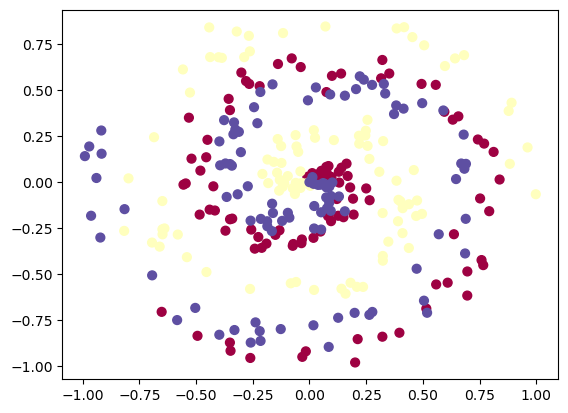

In [6]:
def create_data(points,classes): # This data set is the same as in nnfs.datasets and is called spiral_data
    X = np.zeros((points*classes,2)) # data matrix (each row = single example) # 2D data
    y = np.zeros(points*classes, dtype='uint8') # class labels
    for class_number in range(classes):
        ix = range(points*class_number, points*(class_number+1))
        r = np.linspace(0.0,1,points) # radius
        t = np.linspace(class_number*4,(class_number+1)*4,points) + np.random.randn(points)*0.2 # theta
        X[ix] = np.c_[r*np.sin(t*2.5), r*np.cos(t*2.5)] 
        y[ix] = class_number    
    return X, y     
X, y = create_data(100,3) # 3 classes of 100 data points each
plt.scatter(X[:,0],X[:,1],c=y,s=40,cmap=plt.cm.Spectral)



In [7]:
from nnfs.datasets import spiral_data
np.random.seed(0) ## Set random seed for reproducibility
X, Y = spiral_data(100, 3) # 3 classes of 100 data points each

'''
## Basic ReLU implementation

for i in inputs:
    # if i > 0:
    #     output.append(i)
    # elif i <= 0:
    #     output.append(0)
    output.append(max(0,i)) ## ReLU function

print("ReLU output = ", output)
'''

## Create Layer class 
class Layer_Dense: 
    def __init__(self, n_inputs, n_neurons): ## n_inputs = number of inputs to the layer, n_neurons = number of neurons in the layer
        ## Initialize weights and biases
        self.weights = 0.10 * np.random.randn(n_inputs, n_neurons) ## Random weights with small values. This is useful for forward pass and we do not need to transpose weights here.
        self.biases = np.zeros((1, n_neurons)) ## Biases should be initialized to zero values

    def forward(self, inputs):
        ## Forward pass
        self.output = np.dot(inputs, self.weights) + self.biases


class Activation_ReLU:
    def forward(self, inputs):
        ## Apply ReLU activation function
        self.output = np.maximum(0, inputs) ## Element-wise maximum operation



## Create first layer
layer1 = Layer_Dense(n_inputs=2, n_neurons=5) ## First layer with 2 inputs and 5 neurons
# Create ReLU activation function
activation1 = Activation_ReLU() ## Create ReLU activation function object

## Forward pass through the layers
layer1.forward(X) ## Forward pass through first layer. We will now have layer1.output value
print("Layer 1 output = \n", layer1.output) ## Print output of first layer
# Apply ReLU activation function
activation1.forward(layer1.output) ## Apply ReLU activation function to output of first layer

print("\n")

print("Layer 1 ReLU output = \n", activation1.output) ## Print output of first layer after ReLU activation

# layer2 = Layer_Dense(n_inputs=5, n_neurons=2) ## Second layer with 5 inputs (from previous layer) and 2 neurons
# layer2.forward(layer1.output) ## Forward pass through second layer. We will now have layer2.output value which is calculated from output of first layer
# print("Layer 2 output = \n", layer2.output) ## Print output of second layer

Layer 1 output = 
 [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [-8.35815841e-04 -7.90404397e-04 -1.33452229e-03  4.65504526e-04
   4.56845892e-05]
 [-2.39994444e-03  5.93467943e-05 -2.24808279e-03  2.03573189e-04
   6.10024276e-04]
 ...
 [ 1.13291515e-01 -1.89262273e-01 -2.06855070e-02  8.11079627e-02
  -6.71350806e-02]
 [ 1.34588354e-01 -1.43197830e-01  3.09493973e-02  5.66337522e-02
  -6.29687395e-02]
 [ 1.07817915e-01 -2.00809631e-01 -3.37579330e-02  8.72561871e-02
  -6.81458780e-02]]


Layer 1 ReLU output = 
 [[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 4.65504526e-04
  4.56845892e-05]
 [0.00000000e+00 5.93467943e-05 0.00000000e+00 2.03573189e-04
  6.10024276e-04]
 ...
 [1.13291515e-01 0.00000000e+00 0.00000000e+00 8.11079627e-02
  0.00000000e+00]
 [1.34588354e-01 0.00000000e+00 3.09493973e-02 5.66337522e-02
  0.00000000e+00]
 [1.07817915e-01 0.00000000e+00 0.